<a href="https://colab.research.google.com/github/Randasabag/Etude-de-march-de-la-poule-qui-chante-avec-Python/blob/main/projet9V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='indianred'> LA POULE QUI CHANTE </font>
##MISSION : Analyse pour le lancement à l’international en groupant les pays à cibler pour exporter nos poulets

1ère partie : Prétraitement des données


2ème partie : Analyse  
<li>ACP afin de visualiser les résultats de ton analyse, comprendre les groupes, les liens entre les variables, les liens entre les individus</li>
<li>Méthode des k-means, afin d’affiner l’analyse et comparer les résultats des deux méthodes de clustering et analyse des centroides des classes</li>
<li>Classification ascendante hiérarchique avec un dendrogramme comme visualisation</li>


# Sommaire :
**Partie 1 : Importation des données**
 - <a href="#C1">Importation des librairies</a>
 - <a href="#C2">Importation des jeux de données</a>
 
**Partie 2 : Analyse des jeux de données**
 - <a href="#C3">Affichage du nombre de lignes et colonnes des jeux de données </a>
 - <a href="#C4">Affichage des informations des jeux de données </a>
 - <a href="#C5">Analyse des valeurs manquantes</a>
 - <a href="#C6">Unicité de la clé primaire</a>
 - <a href="#C7">Analyse des doublons</a>
 - <a href="#C8">Jointure des tables</a>
 - <a href="#C9">Indicateurs choisis</a>



**Partie 3 : Analyse univariée des indicateurs**
 - <a href="#C10">Disponibilité alimentaire</a>
 - <a href="#C11">Importations</a>
 - <a href="#C12">Production</a>
 - <a href="#C13">Population</a>
 - <a href="#C14">PIB/Habitant</a>
 - <a href="#C15">Indice de stabilité politique</a>


**Partie 4 : Analyse bivariée des indicateurs**
 - <a href="#C16">Disponibilité alimentaire/Importations</a>
 - <a href="#C17">Disponibilité alimentaire/Production</a>
 - <a href="#C18">Importations/Production</a>
 - <a href="#C19">Importations/Population</a>
 - <a href="#C20">Indice de stabilité politique/PIB par Habitant</a>

**Partie 5 : Analyse bivariée des indicateurs** 
 - <a href="#C21"></a>

# **<font color='indianred'>Partie 1 : Importation des données</font>**

# <a name="C1"><font color='LightSeaGreen'>Importation des librairies</font></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import io
from google.colab import files

# <a name="C2"><font color='LightSeaGreen'>Importation des données</font></a>

In [2]:
uploaded = files.upload()

Saving DisponibiliteAlimentaire_2017.csv to DisponibiliteAlimentaire_2017.csv
Saving Population 2007-2017.csv to Population 2007-2017.csv
Saving secu_pib_prot.csv to secu_pib_prot.csv


In [3]:
from google.colab import files
functions = files.upload()

Saving functions.py to functions.py


In [361]:
#Disponibilité alimentaire pour l'année 2017
df_dispo=pd.read_csv(io.BytesIO(uploaded['DisponibiliteAlimentaire_2017.csv'])) 
df_dispo.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [362]:
#Population 2007 et 2017
df_pop=pd.read_csv(io.BytesIO(uploaded['Population 2007-2017.csv'])) 
df_pop.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2007,2007,1000 personnes,27100.536,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,36296.113,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2007,2007,1000 personnes,49119.759,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,57009.756,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,3,Albanie,511,Population totale,3010,Population-Estimations,2007,2007,1000 personnes,3033.998,X,Sources internationales sûres,NaN


In [363]:
#Tableau regroupant les données sur le PIB/habitant, l'indice de stabilité politique et 
#la disponibilité des protéines animales et totale en 2017
df_secu_pib_prot=pd.read_csv(io.BytesIO(uploaded['secu_pib_prot.csv'])) 
df_secu_pib_prot.head(60)

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,2,Afghanistan,6123,Valeur,21013,Disponibilités protéiques moyennes (g/personne...,20162018,2016-2018,g/personne/jour,58.00,F,Estimation FAO,NaN
1,FS,Données de la sécurité alimentaire,2,Afghanistan,6123,Valeur,21014,Disponibilités protéines moyennes d’origine an...,20162018,2016-2018,g/personne/jour,10.70,F,Estimation FAO,NaN
2,FS,Données de la sécurité alimentaire,2,Afghanistan,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,2058.40,X,Sources internationales sûres,NaN
3,FS,Données de la sécurité alimentaire,2,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-2.80,X,Sources internationales sûres,NaN
4,FS,Données de la sécurité alimentaire,202,Afrique du Sud,6123,Valeur,21013,Disponibilités protéiques moyennes (g/personne...,20162018,2016-2018,g/personne/jour,79.70,F,Estimation FAO,NaN
5,FS,Données de la sécurité alimentaire,202,Afrique du Sud,6123,Valeur,21014,Disponibilités protéines moyennes d’origine an...,20162018,2016-2018,g/personne/jour,35.70,F,Estimation FAO,NaN
6,FS,Données de la sécurité alimentaire,202,Afrique du Sud,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,13860.30,X,Sources internationales sûres,NaN
7,FS,Données de la sécurité alimentaire,202,Afrique du Sud,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-0.28,X,Sources internationales sûres,NaN
8,FS,Données de la sécurité alimentaire,3,Albanie,6123,Valeur,21013,Disponibilités protéiques moyennes (g/personne...,20162018,2016-2018,g/personne/jour,113.30,F,Estimation FAO,NaN
9,FS,Données de la sécurité alimentaire,3,Albanie,6123,Valeur,21014,Disponibilités protéines moyennes d’origine an...,20162018,2016-2018,g/personne/jour,61.00,F,Estimation FAO,NaN


##<font color='purple'>Préparation des données</font>

### Table Disponibilité Alimentaire

In [364]:
#La table Disponibilité Alimentaire contient des données pour l'année 2017
#Garder la viande de volailles 
df_dispovol=df_dispo[df_dispo['Produit']=='Viande de Volailles']     
#renomme la colonne zone par pays
df_dispovol=df_dispovol.rename(columns={'Zone':'Pays'})   
df_dispovol.head()

,Code Domaine,Domaine,Code zone,Pays,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
651,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,28.0,S,Données standardisées
652,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,29.0,S,Données standardisées
653,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2734,Viande de Volailles,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
654,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2734,Viande de Volailles,2017,2017,Milliers de tonnes,57.0,S,Données standardisées
655,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5123,Pertes,2734,Viande de Volailles,2017,2017,Milliers de tonnes,2.0,S,Données standardisées


In [365]:
df_dispovol=df_dispovol[['Pays', 'Élément', 'Unité', 'Valeur']]
df_dispovol.head()

,Pays,Élément,Unité,Valeur
651,Afghanistan,Production,Milliers de tonnes,28.0
652,Afghanistan,Importations - Quantité,Milliers de tonnes,29.0
653,Afghanistan,Variation de stock,Milliers de tonnes,0.0
654,Afghanistan,Disponibilité intérieure,Milliers de tonnes,57.0
655,Afghanistan,Pertes,Milliers de tonnes,2.0


In [366]:
#Pivot
df_dispovol=df_dispovol.pivot_table(index='Pays', columns='Élément', values='Valeur', aggfunc=sum)
df_dispovol.head(60)

Élément,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
Pays,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,5.0,1.53,0.33,0.54,57.0,NaN,29.0,55.0,2.0,28.0,0.0,NaN,NaN,0.0
Afrique du Sud,0.0,NaN,NaN,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,2035.0,83.0,1667.0,0.0,NaN,NaN,0.0
Albanie,NaN,NaN,NaN,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,NaN,13.0,0.0,NaN,NaN,4.0
Algérie,0.0,NaN,NaN,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,13.0,275.0,0.0,NaN,NaN,0.0
Allemagne,NaN,NaN,NaN,71.0,19.47,4.16,7.96,1739.0,646.0,842.0,1609.0,NaN,1514.0,-38.0,NaN,167.0,-29.0
Angola,0.0,NaN,NaN,35.0,10.56,2.22,3.60,319.0,0.0,277.0,315.0,2.0,42.0,0.0,NaN,2.0,0.0
Antigua-et-Barbuda,2.0,NaN,0.0,233.0,54.10,17.55,17.77,7.0,0.0,7.0,5.0,NaN,0.0,0.0,NaN,NaN,0.0
Arabie saoudite,NaN,NaN,NaN,151.0,43.36,9.38,15.57,1435.0,10.0,722.0,1435.0,NaN,616.0,0.0,NaN,NaN,-108.0
Argentine,NaN,NaN,NaN,182.0,42.24,13.84,13.53,1962.0,207.0,8.0,1856.0,106.0,2161.0,0.0,NaN,NaN,0.0


In [367]:
#Sélection des variables qui nous intéresse pour le moment
df_dispovol=df_dispovol.reset_index()
df_dispovol=df_dispovol[['Pays', 'Disponibilité alimentaire en quantité (kg/personne/an)', 'Disponibilité intérieure', 'Exportations - Quantité',	'Importations - Quantité', 'Production', 'Variation de stock']]
df_dispovol.head(2)

Élément,Pays,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Variation de stock
0,Afghanistan,1.53,57.0,NaN,29.0,28.0,0.0
1,Afrique du Sud,35.69,2118.0,63.0,514.0,1667.0,0.0


In [368]:
#renomme les colonnes
df_dispovol=df_dispovol.rename(columns={'Disponibilité alimentaire en quantité (kg/personne/an)':'Disponibilité alimentaire', 'Exportations - Quantité' : 'Exportations', 'Importations - Quantité':'Importations'})   

### Table Population

In [369]:
df_pop=df_pop[['Zone', 'Année','Unité', 'Valeur']]
df_pop.head()

,Zone,Année,Unité,Valeur
0,Afghanistan,2007,1000 personnes,27100.536
1,Afghanistan,2017,1000 personnes,36296.113
2,Afrique du Sud,2007,1000 personnes,49119.759
3,Afrique du Sud,2017,1000 personnes,57009.756
4,Albanie,2007,1000 personnes,3033.998


In [370]:
df_pop=df_pop.pivot_table(index='Zone', columns='Année', values='Valeur', aggfunc=sum)
df_pop.head()

Année,2007,2017
Zone,,
Afghanistan,27100.536,36296.113
Afrique du Sud,49119.759,57009.756
Albanie,3033.998,2884.169
Algérie,34166.972,41389.189
Allemagne,81277.830,82658.409


In [371]:
df_pop=df_pop.reset_index()

In [372]:
#renomme la colonne zone par pays
df_pop=df_pop.rename(columns={'Zone':'Pays', 2007:'pop2007', 2017: 'pop2017'}) 
df_pop.head()

Année,Pays,pop2007,pop2017
0,Afghanistan,27100.536,36296.113
1,Afrique du Sud,49119.759,57009.756
2,Albanie,3033.998,2884.169
3,Algérie,34166.972,41389.189
4,Allemagne,81277.830,82658.409


In [373]:
#conversion de la population en unités
df_pop['pop2007']=df_pop['pop2007'] * 1000
df_pop['pop2017']=df_pop['pop2017'] * 1000
df_pop.head()

Année,Pays,pop2007,pop2017
0,Afghanistan,27100536.0,36296113.0
1,Afrique du Sud,49119759.0,57009756.0
2,Albanie,3033998.0,2884169.0
3,Algérie,34166972.0,41389189.0
4,Allemagne,81277830.0,82658409.0


In [374]:
df_pop=df_pop[['Pays', 'pop2007', 'pop2017']]
df_pop.head()

Année,Pays,pop2007,pop2017
0,Afghanistan,27100536.0,36296113.0
1,Afrique du Sud,49119759.0,57009756.0
2,Albanie,3033998.0,2884169.0
3,Algérie,34166972.0,41389189.0
4,Allemagne,81277830.0,82658409.0


### Table PIB, Indice de stabilité politique et moyennes protéiques

In [375]:
df_secu_pib_prot=df_secu_pib_prot.pivot_table(index='Zone', columns='Produit', values='Valeur', aggfunc=sum)
df_secu_pib_prot.tail(60)

Produit,Disponibilités protéines moyennes d’origine animale (g/personne/jour) (moyenne sur 3 ans),Disponibilités protéiques moyennes (g/personne/jour) (moyenne sur 3 ans),"PIB par habitant, ($ PPA internationaux constants de 2017)",Stabilité politique et absence de violence/terrorisme (indice)
Zone,,,,
Rwanda,8.0,60.0,1975.2,0.09
République arabe syrienne,0.0,0.0,0.0,-2.62
République centrafricaine,20.0,50.7,912.8,-2.01
République de Corée,51.3,96.7,40957.4,0.39
République de Moldova,29.3,71.0,11651.3,-0.32
République dominicaine,32.0,64.7,16735.4,0.16
République démocratique du Congo,3.0,25.7,1059.8,-2.30
République démocratique populaire lao,18.3,75.3,7257.8,0.40
République populaire démocratique de Corée,10.0,54.3,0.0,-0.50


In [376]:
df_secu_pib_prot=df_secu_pib_prot.reset_index()
#renomme la colonne zone par pays
df_secu_pib_prot=df_secu_pib_prot.rename(columns=
                                         {'Zone':'Pays', 
                                          'Disponibilités protéines moyennes d’origine animale (g/personne/jour) (moyenne sur 3 ans)': 'Moy_prot_animales',
                                          'Disponibilités protéiques moyennes (g/personne/jour) (moyenne sur 3 ans)': 'Moy_prot',
                                          'PIB par habitant, ($ PPA internationaux constants de 2017)' : 'PIB/Hab', 
                                          'Stabilité politique et absence de violence/terrorisme (indice)': 'Indice de stabilité'}) 
df_secu_pib_prot.head()

Produit,Pays,Moy_prot_animales,Moy_prot,PIB/Hab,Indice de stabilité
0,Afghanistan,10.7,58.0,2058.4,-2.80
1,Afrique du Sud,35.7,79.7,13860.3,-0.28
2,Albanie,61.0,113.3,12771.0,0.38
3,Algérie,25.0,89.3,11737.4,-0.92
4,Allemagne,63.0,104.3,53071.5,0.59


# **<font color='indianred'>Partie 2 : Analyse des jeux de données</font>**

# <a name="C3"><font color='LightSeaGreen'>Affichage du nombre de lignes et colonnes des jeux de données</font></a>

In [377]:
#nombre de lignes et colonnes
print('Disponibilité alimentaire',df_dispovol.shape)
print('Population',df_pop.shape)
print('PIB_Indice_Prot',df_secu_pib_prot.shape)

Disponibilité alimentaire (172, 7)
Population (238, 3)
PIB_Indice_Prot (204, 5)


# <a name="C4"><font color='LightSeaGreen'>Affichage des informations des jeux de données</font></a>

In [378]:
print('Table Disponibilité Alimentaire')
df_dispovol.info()
print('\n')
print('Table Population')
print('-------------------------------------')
df_pop.info()
print('\n')
print('Table PIB Indice Moyennes Protéiques')
print('-------------------------------------')
df_secu_pib_prot.info()

Table Disponibilité Alimentaire
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Pays                       172 non-null    object 
 1   Disponibilité alimentaire  172 non-null    float64
 2   Disponibilité intérieure   170 non-null    float64
 3   Exportations               135 non-null    float64
 4   Importations               170 non-null    float64
 5   Production                 168 non-null    float64
 6   Variation de stock         169 non-null    float64
dtypes: float64(6), object(1)
memory usage: 9.5+ KB


Table Population
-------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Pays     238 non-null    object 
 1   pop2007  231 non-null    flo

# <a name="C5"><font color='LightSeaGreen'>Analyse des valeurs manquantes</font></a>

In [379]:
#Création d'une fonction calculant le pourcentage de valeurs manquantes 
#et affichant une heatmap pour visualiser les valeurs manquantes 
def val_manq(df):
    ligne,colonne=df.shape
    nb_cell=ligne*colonne
    nb_null=df.isnull().sum().sum()
    prct=nb_null *100/nb_cell
    print('Nombre de valeurs manquantes =',nb_null)
    print('Nombre de cellulles totales =',nb_cell)
    print('Pourcentage de valeurs manquantes = ',round(prct,2),'%') 
    print('\n')
    #print('Pourcentage de valeurs manquantes avec le nombre de colonnes =\n',(df.isna().sum()).value_counts(ascending=True))
    #Calcul des pourcentages de valeurs manquantes par variable(colonne)
    print('\n')
    print('Pourcentage de valeurs manquantes par variable/colonne =\n', 
          (df.isna().sum()).sort_values(ascending=True))
    print('\n')

In [380]:
#Appel de la fonction val_manq 
#Affichage des pourcentages de valeurs manquantes des 2 jeux de données 
print('1-Table disponibilité alimentaire :')
val_manq(df_dispovol)
print('---------------------------------------')
print('2-Table population :')
val_manq(df_pop)
print('---------------------------------------')
print('3-Table PIB Indice Moyennes Protéiques :')
val_manq(df_secu_pib_prot)

1-Table disponibilité alimentaire :
Nombre de valeurs manquantes = 48
Nombre de cellulles totales = 1204
Pourcentage de valeurs manquantes =  3.99 %




Pourcentage de valeurs manquantes par variable/colonne =
 Élément
Pays                          0
Disponibilité alimentaire     0
Disponibilité intérieure      2
Importations                  2
Variation de stock            3
Production                    4
Exportations                 37
dtype: int64


---------------------------------------
2-Table population :
Nombre de valeurs manquantes = 8
Nombre de cellulles totales = 714
Pourcentage de valeurs manquantes =  1.12 %




Pourcentage de valeurs manquantes par variable/colonne =
 Année
Pays       0
pop2017    1
pop2007    7
dtype: int64


---------------------------------------
3-Table PIB Indice Moyennes Protéiques :
Nombre de valeurs manquantes = 0
Nombre de cellulles totales = 1020
Pourcentage de valeurs manquantes =  0.0 %




Pourcentage de valeurs manquantes par variable/colon

##<font color='purple'>Affichage des valeurs manquantes et affectation de valeurs</font>

In [381]:
#affiche le df avec au moins une valeur manquante par ligne
df_dispovol_null = df_dispovol[df_dispovol.isnull().any(axis=1)]
df_dispovol_null

Élément,Pays,Disponibilité alimentaire,Disponibilité intérieure,Exportations,Importations,Production,Variation de stock
0,Afghanistan,1.53,57.0,NaN,29.0,28.0,0.0
13,Bahamas,43.17,26.0,NaN,24.0,6.0,4.0
14,Bangladesh,1.50,250.0,NaN,0.0,249.0,0.0
23,Burkina Faso,2.27,46.0,NaN,0.0,46.0,0.0
26,Cabo Verde,17.62,10.0,NaN,12.0,1.0,4.0
27,Cambodge,2.34,38.0,NaN,10.0,28.0,0.0
40,Cuba,23.72,342.0,NaN,312.0,29.0,-1.0
43,Djibouti,2.68,3.0,NaN,3.0,NaN,0.0
54,Gambie,3.53,8.0,NaN,16.0,2.0,10.0
56,Grenade,45.70,8.0,NaN,7.0,1.0,0.0


In [382]:
#Equation
df_dispovol_null['Exportations']=df_dispovol_null['Production']+df_dispovol_null['Importations']+df_dispovol_null['Variation de stock']-df_dispovol_null['Disponibilité intérieure']
df_dispovol_null

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Élément,Pays,Disponibilité alimentaire,Disponibilité intérieure,Exportations,Importations,Production,Variation de stock
0,Afghanistan,1.53,57.0,0.0,29.0,28.0,0.0
13,Bahamas,43.17,26.0,8.0,24.0,6.0,4.0
14,Bangladesh,1.50,250.0,-1.0,0.0,249.0,0.0
23,Burkina Faso,2.27,46.0,0.0,0.0,46.0,0.0
26,Cabo Verde,17.62,10.0,7.0,12.0,1.0,4.0
27,Cambodge,2.34,38.0,0.0,10.0,28.0,0.0
40,Cuba,23.72,342.0,-2.0,312.0,29.0,-1.0
43,Djibouti,2.68,3.0,NaN,3.0,NaN,0.0
54,Gambie,3.53,8.0,20.0,16.0,2.0,10.0
56,Grenade,45.70,8.0,0.0,7.0,1.0,0.0


In [383]:
df_dispovol_null[df_dispovol_null.isnull().any(axis=1)]

Élément,Pays,Disponibilité alimentaire,Disponibilité intérieure,Exportations,Importations,Production,Variation de stock
43,Djibouti,2.68,3.0,NaN,3.0,NaN,0.0
92,Maldives,13.50,12.0,NaN,12.0,NaN,0.0
113,Ouzbékistan,1.96,NaN,NaN,NaN,NaN,NaN
122,Pérou,13.47,1523.0,NaN,60.0,1465.0,NaN
130,République démocratique populaire lao,10.91,NaN,NaN,NaN,NaN,NaN


In [384]:
df_dispovol_null[df_dispovol_null.isnull().any(axis=1)]

Élément,Pays,Disponibilité alimentaire,Disponibilité intérieure,Exportations,Importations,Production,Variation de stock
43,Djibouti,2.68,3.0,NaN,3.0,NaN,0.0
92,Maldives,13.50,12.0,NaN,12.0,NaN,0.0
113,Ouzbékistan,1.96,NaN,NaN,NaN,NaN,NaN
122,Pérou,13.47,1523.0,NaN,60.0,1465.0,NaN
130,République démocratique populaire lao,10.91,NaN,NaN,NaN,NaN,NaN


In [385]:
#Affectation des valeurs manquantes par les valeurs trouvées dans mes recherches
df_dispovol_null.loc[df_dispovol_null['Pays'] == 'Pérou','Exportations'] = 1
df_dispovol_null.loc[df_dispovol_null['Pays'] == 'Pérou','Importations'] = 60
df_dispovol_null.loc[df_dispovol_null['Pays'] == 'Pérou','Variation de stock'] = 0
df_dispovol_null.loc[df_dispovol_null['Pays'] == 'Ouzbékistan','Importations'] = 8
df_dispovol_null.loc[df_dispovol_null['Pays'] == 'Ouzbékistan','Disponibilité intérieure'] = 67
df_dispovol_null.loc[df_dispovol_null['Pays'] == 'Ouzbékistan','Production'] = 58
df_dispovol_null.loc[df_dispovol_null['Pays'] == 'Ouzbékistan','Variation de stock'] = -2
df_dispovol_null.loc[df_dispovol_null['Pays'] == 'Ouzbékistan','Exportations'] = 0
df_dispovol_null.loc[df_dispovol_null['Pays'] == 'Djibouti','Importations'] = 3
df_dispovol_null.loc[df_dispovol_null['Pays'] == 'Maldives','Importations'] = 12
df_dispovol_null.loc[df_dispovol_null['Pays'] == 'République démocratique populaire lao','Importations'] = 5
df_dispovol_null.loc[df_dispovol_null['Pays'] == 'République démocratique populaire lao','Production'] = 33
df_dispovol_null.loc[df_dispovol_null['Pays'] == 'République démocratique populaire lao','Variation de stock'] = 0
df_dispovol_null.loc[df_dispovol_null['Pays'] == 'République démocratique populaire lao','Disponibilité intérieure'] = 38
df_dispovol_null.loc[df_dispovol_null['Pays'] == 'République démocratique populaire lao','Exportations'] = 0

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [386]:
df_dispovol_null[df_dispovol_null.isnull().any(axis=1)]

Élément,Pays,Disponibilité alimentaire,Disponibilité intérieure,Exportations,Importations,Production,Variation de stock
43,Djibouti,2.68,3.0,NaN,3.0,NaN,0.0
92,Maldives,13.50,12.0,NaN,12.0,NaN,0.0


In [387]:
#Il reste toujours 4 valeurs manquantes pour l'exportation et la production des Maldives et Djibouti 
#que je vais remplacer par 0
df_dispovol_null=df_dispovol_null.fillna(0)
df_dispovol_null.head()

Élément,Pays,Disponibilité alimentaire,Disponibilité intérieure,Exportations,Importations,Production,Variation de stock
0,Afghanistan,1.53,57.0,0.0,29.0,28.0,0.0
13,Bahamas,43.17,26.0,8.0,24.0,6.0,4.0
14,Bangladesh,1.50,250.0,-1.0,0.0,249.0,0.0
23,Burkina Faso,2.27,46.0,0.0,0.0,46.0,0.0
26,Cabo Verde,17.62,10.0,7.0,12.0,1.0,4.0


In [388]:
df_dispovol_null[df_dispovol_null.isnull().any(axis=1)]

Élément,Pays,Disponibilité alimentaire,Disponibilité intérieure,Exportations,Importations,Production,Variation de stock


In [389]:
df_dispovol.head()

Élément,Pays,Disponibilité alimentaire,Disponibilité intérieure,Exportations,Importations,Production,Variation de stock
0,Afghanistan,1.53,57.0,NaN,29.0,28.0,0.0
1,Afrique du Sud,35.69,2118.0,63.0,514.0,1667.0,0.0
2,Albanie,16.36,47.0,0.0,38.0,13.0,4.0
3,Algérie,6.38,277.0,0.0,2.0,275.0,0.0
4,Allemagne,19.47,1739.0,646.0,842.0,1514.0,-29.0


In [390]:
#Suppression des lignes où il y a des valeurs manquantes
df_dispovol=df_dispovol.dropna()

In [391]:
#Concaténation
df_dispovol=df_dispovol.append(df_dispovol_null)

In [392]:
df_dispovol[df_dispovol.isnull().any(axis=1)]

Élément,Pays,Disponibilité alimentaire,Disponibilité intérieure,Exportations,Importations,Production,Variation de stock


In [393]:
df_dispovol.sort_values(by='Pays', ascending=True).head()

Élément,Pays,Disponibilité alimentaire,Disponibilité intérieure,Exportations,Importations,Production,Variation de stock
0,Afghanistan,1.53,57.0,0.0,29.0,28.0,0.0
1,Afrique du Sud,35.69,2118.0,63.0,514.0,1667.0,0.0
2,Albanie,16.36,47.0,0.0,38.0,13.0,4.0
3,Algérie,6.38,277.0,0.0,2.0,275.0,0.0
4,Allemagne,19.47,1739.0,646.0,842.0,1514.0,-29.0


In [394]:
df_pop[df_pop.isnull().any(axis=1)] 

Année,Pays,pop2007,pop2017
26,"Bonaire, Saint-Eustache et Saba",NaN,25401.0
53,Curaçao,NaN,161997.0
170,Saint-Barthélemy,NaN,9784.0
173,Saint-Martin (partie française),NaN,36560.0
186,Sint Maarten (partie néerlandaise),NaN,41444.0
190,Soudan,NaN,40813397.0
191,Soudan (ex),40675760.0,NaN
192,Soudan du Sud,NaN,10910763.0


8 valeurs manquantes dans la table population, nous ne pourrons pas étudier l'évolution de la population entre 2007 et 2017 pour les pays ci-dessus.

In [395]:
#Je vais juste remplacer la population du Soudan en 2007 (dont la valeur n'existe pas dans le site de la FAO mais que j'ai trouvé sur google)
df_pop.loc[df_pop['Pays'] == 'Soudan','pop2007'] = 32360000

In [396]:
df_secu_pib_prot.head()

Produit,Pays,Moy_prot_animales,Moy_prot,PIB/Hab,Indice de stabilité
0,Afghanistan,10.7,58.0,2058.4,-2.80
1,Afrique du Sud,35.7,79.7,13860.3,-0.28
2,Albanie,61.0,113.3,12771.0,0.38
3,Algérie,25.0,89.3,11737.4,-0.92
4,Allemagne,63.0,104.3,53071.5,0.59


In [397]:
df_secu_pib_prot[df_secu_pib_prot.isnull().any(axis=1)]

Produit,Pays,Moy_prot_animales,Moy_prot,PIB/Hab,Indice de stabilité


In [398]:
#Affectation des valeurs manquantes par les valeurs trouvées dans mes recherches
df_secu_pib_prot.loc[df_secu_pib_prot['Pays'] == 'Andorre','PIB/Hab'] = 56352.2
df_secu_pib_prot.loc[df_secu_pib_prot['Pays'] == 'Chine, Taiwan Province de','PIB/Hab'] = 48500.8
df_secu_pib_prot.loc[df_secu_pib_prot['Pays'] == 'Samoa américaines','PIB/Hab'] = 5668
df_secu_pib_prot.loc[df_secu_pib_prot['Pays'] == 'Soudan du Sud','PIB/Hab'] = 888.8
df_secu_pib_prot.loc[df_secu_pib_prot['Pays'] == 'Yémen','PIB/Hab'] = 2150
df_secu_pib_prot.loc[df_secu_pib_prot['Pays'] == 'Érythrée','PIB/Hab'] = 1537.5

In [399]:
#Il reste toujours des valeurs manquantes pour 6 pays pour les 2 variables PIB par habitant et l'indice de Stabilité politique 
#que je vais remplacer par 0
df_secu_pib_prot=df_secu_pib_prot.fillna(0)
df_secu_pib_prot.head(10)

Produit,Pays,Moy_prot_animales,Moy_prot,PIB/Hab,Indice de stabilité
0,Afghanistan,10.7,58.0,2058.4,-2.80
1,Afrique du Sud,35.7,79.7,13860.3,-0.28
2,Albanie,61.0,113.3,12771.0,0.38
3,Algérie,25.0,89.3,11737.4,-0.92
4,Allemagne,63.0,104.3,53071.5,0.59
5,Andorre,0.0,0.0,56352.2,1.42
6,Angola,15.7,52.4,7310.9,-0.38
7,Antigua-et-Barbuda,0.0,0.0,19840.3,0.75
8,Arabie saoudite,34.6,88.3,47306.2,-0.64
9,Argentine,67.3,105.7,23597.1,0.17


In [400]:
df_secu_pib_prot[df_secu_pib_prot.isnull().any(axis=1)]

Produit,Pays,Moy_prot_animales,Moy_prot,PIB/Hab,Indice de stabilité


# <a name="C6"><font color='LightSeaGreen'>Unicité de la clé primaire</font></a>

In [401]:
#Creation d'une fonction qui teste l'unicité d'une colonne
def cle_primaire(df,col):
    if len(df)==len(df[col].unique()):
        print('La variable', col, 'est une clé primaire')
    else: 
        print('La variable', col, 'n\'est pas une clé primaire')

In [402]:
cle_primaire(df_dispovol,'Pays')
cle_primaire(df_pop,'Pays')
cle_primaire(df_secu_pib_prot,'Pays')

La variable Pays est une clé primaire
La variable Pays est une clé primaire
La variable Pays est une clé primaire


# <a name="C7"><font color='LightSeaGreen'>Analyse des doublons</font></a>

In [403]:
#Fonction qui detecte les doublons
def detect_doublons(df):
    doub=df[df[df.columns].duplicated(subset=None, keep='first')]
    print('------------------') 
    print('La table contient', len(doub), 'doublons.')
    print(doub.shape)
    print('\n') 
    print(doub)
    print('\n')

In [404]:
print('------------------') 
print('Table disponibilité alimentaire')
detect_doublons(df_dispovol)
print('------------------') 
print('Table population')
detect_doublons(df_pop)
print('------------------') 
print('Table pib indice moyennes protéiques')
detect_doublons(df_secu_pib_prot)

------------------
Table disponibilité alimentaire
------------------
La table contient 0 doublons.
(0, 7)


Empty DataFrame
Columns: [Pays, Disponibilité alimentaire, Disponibilité intérieure, Exportations, Importations, Production, Variation de stock]
Index: []


------------------
Table population
------------------
La table contient 0 doublons.
(0, 3)


Empty DataFrame
Columns: [Pays, pop2007, pop2017]
Index: []


------------------
Table pib indice moyennes protéiques
------------------
La table contient 0 doublons.
(0, 5)


Empty DataFrame
Columns: [Pays, Moy_prot_animales, Moy_prot, PIB/Hab, Indice de stabilité]
Index: []




# <a name="C8"><font color='LightSeaGreen'>Jointure des tables</font></a>

In [405]:
#Jointure externe complète entre disponibilité alimentaire et population
df_dispop=pd.merge(df_dispovol, df_pop, left_on='Pays', right_on='Pays', how='outer', indicator=True)
df_dispop

,Pays,Disponibilité alimentaire,Disponibilité intérieure,Exportations,Importations,Production,Variation de stock,pop2007,pop2017,_merge
0,Afrique du Sud,35.69,2118.0,63.0,514.0,1667.0,0.0,49119759.0,57009756.0,both
1,Albanie,16.36,47.0,0.0,38.0,13.0,4.0,3033998.0,2884169.0,both
2,Algérie,6.38,277.0,0.0,2.0,275.0,0.0,34166972.0,41389189.0,both
3,Allemagne,19.47,1739.0,646.0,842.0,1514.0,-29.0,81277830.0,82658409.0,both
4,Angola,10.56,319.0,0.0,277.0,42.0,0.0,20905363.0,29816766.0,both
...,...,...,...,...,...,...,...,...,...,...
233,Îles Marshall,NaN,NaN,NaN,NaN,NaN,NaN,56051.0,58058.0,right_only
234,Îles Turques-et-Caïques,NaN,NaN,NaN,NaN,NaN,NaN,30385.0,37115.0,right_only
235,Îles Vierges américaines,NaN,NaN,NaN,NaN,NaN,NaN,107115.0,104751.0,right_only
236,Îles Vierges britanniques,NaN,NaN,NaN,NaN,NaN,NaN,25047.0,29577.0,right_only


In [406]:
df_dispop[df_dispop.isnull().any(axis=1)]

,Pays,Disponibilité alimentaire,Disponibilité intérieure,Exportations,Importations,Production,Variation de stock,pop2007,pop2017,_merge
172,Andorre,NaN,NaN,NaN,NaN,NaN,NaN,82684.0,77001.0,right_only
173,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,12868.0,14584.0,right_only
174,Antilles néerlandaises (ex),NaN,NaN,NaN,NaN,NaN,NaN,231665.0,275186.0,right_only
175,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,101222.0,105366.0,right_only
176,Bahreïn,NaN,NaN,NaN,NaN,NaN,NaN,1035919.0,1494076.0,right_only
...,...,...,...,...,...,...,...,...,...,...
233,Îles Marshall,NaN,NaN,NaN,NaN,NaN,NaN,56051.0,58058.0,right_only
234,Îles Turques-et-Caïques,NaN,NaN,NaN,NaN,NaN,NaN,30385.0,37115.0,right_only
235,Îles Vierges américaines,NaN,NaN,NaN,NaN,NaN,NaN,107115.0,104751.0,right_only
236,Îles Vierges britanniques,NaN,NaN,NaN,NaN,NaN,NaN,25047.0,29577.0,right_only


In [407]:
#Suppression des pays où il manque des informations dans la table disponibilité alimentaire
df_dispop=df_dispop.drop(df_dispop[df_dispop['_merge']=='right_only'].index)
df_dispop.tail(60)

,Pays,Disponibilité alimentaire,Disponibilité intérieure,Exportations,Importations,Production,Variation de stock,pop2007,pop2017,_merge
112,Suisse,15.72,133.0,4.0,51.0,91.0,5.0,7536982.0,8455804.0,both
113,Suriname,31.06,25.0,5.0,18.0,10.0,-2.0,511181.0,570496.0,both
114,Suède,16.60,187.0,23.0,84.0,157.0,31.0,9162939.0,9904896.0,both
115,Sénégal,4.76,77.0,0.0,0.0,77.0,0.0,11687080.0,15419355.0,both
116,Tchad,0.45,7.0,0.0,1.0,6.0,0.0,10818024.0,15016753.0,both
117,Tchéquie,21.96,249.0,27.0,116.0,163.0,3.0,10357538.0,10641034.0,both
118,Thaïlande,12.95,881.0,796.0,2.0,1676.0,1.0,66182067.0,69209810.0,both
119,Togo,7.06,54.0,0.0,16.0,40.0,1.0,5920359.0,7698474.0,both
120,Trinité-et-Tobago,54.54,76.0,0.0,23.0,61.0,8.0,1308451.0,1384059.0,both
121,Tunisie,17.03,195.0,4.0,0.0,213.0,15.0,10304726.0,11433443.0,both


In [408]:
df_dispop[df_dispop.isnull().any(axis=1)]

,Pays,Disponibilité alimentaire,Disponibilité intérieure,Exportations,Importations,Production,Variation de stock,pop2007,pop2017,_merge


In [409]:
#Jointure externe complète entre dispop et la table du PIB et de la stabilité politique
df_fin=pd.merge(df_dispop, df_secu_pib_prot, left_on='Pays', right_on='Pays', how='outer')
df_fin

,Pays,Disponibilité alimentaire,Disponibilité intérieure,Exportations,Importations,Production,Variation de stock,pop2007,pop2017,_merge,Moy_prot_animales,Moy_prot,PIB/Hab,Indice de stabilité
0,Afrique du Sud,35.69,2118.0,63.0,514.0,1667.0,0.0,49119759.0,57009756.0,both,35.7,79.7,13860.3,-0.28
1,Albanie,16.36,47.0,0.0,38.0,13.0,4.0,3033998.0,2884169.0,both,61.0,113.3,12771.0,0.38
2,Algérie,6.38,277.0,0.0,2.0,275.0,0.0,34166972.0,41389189.0,both,25.0,89.3,11737.4,-0.92
3,Allemagne,19.47,1739.0,646.0,842.0,1514.0,-29.0,81277830.0,82658409.0,both,63.0,104.3,53071.5,0.59
4,Angola,10.56,319.0,0.0,277.0,42.0,0.0,20905363.0,29816766.0,both,15.7,52.4,7310.9,-0.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,Tonga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,6466.3,0.79
200,Tuvalu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,4010.1,1.24
201,Érythrée,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1537.5,-0.73
202,Îles Cook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.00


In [410]:
df_fin[df_fin.isnull().any(axis=1)].head()

,Pays,Disponibilité alimentaire,Disponibilité intérieure,Exportations,Importations,Production,Variation de stock,pop2007,pop2017,_merge,Moy_prot_animales,Moy_prot,PIB/Hab,Indice de stabilité
172,Andorre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,56352.2,1.42
173,Bahreïn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,47709.8,-0.96
174,Bermudes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,81835.0,1.00
175,Bhoutan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,11142.5,1.12
176,Brunéi Darussalam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,60994.5,1.16


In [411]:
#Suppression des pays qui n'ont aucune information dans la table disponibilité alimentaire et dans la table population
df_fin=df_fin.dropna()
df_fin

,Pays,Disponibilité alimentaire,Disponibilité intérieure,Exportations,Importations,Production,Variation de stock,pop2007,pop2017,_merge,Moy_prot_animales,Moy_prot,PIB/Hab,Indice de stabilité
0,Afrique du Sud,35.69,2118.0,63.0,514.0,1667.0,0.0,49119759.0,57009756.0,both,35.7,79.7,13860.3,-0.28
1,Albanie,16.36,47.0,0.0,38.0,13.0,4.0,3033998.0,2884169.0,both,61.0,113.3,12771.0,0.38
2,Algérie,6.38,277.0,0.0,2.0,275.0,0.0,34166972.0,41389189.0,both,25.0,89.3,11737.4,-0.92
3,Allemagne,19.47,1739.0,646.0,842.0,1514.0,-29.0,81277830.0,82658409.0,both,63.0,104.3,53071.5,0.59
4,Angola,10.56,319.0,0.0,277.0,42.0,0.0,20905363.0,29816766.0,both,15.7,52.4,7310.9,-0.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Timor-Leste,4.24,5.0,14.0,11.0,1.0,7.0,1036392.0,1243258.0,both,14.6,54.9,3177.5,0.07
168,Turkménistan,4.52,27.0,4.0,9.0,20.0,2.0,4870141.0,5757667.0,both,36.7,90.0,14205.0,-0.13
169,Vanuatu,11.66,3.0,3.0,4.0,1.0,1.0,219472.0,285510.0,both,26.7,64.0,3081.5,0.70
170,Zimbabwe,4.68,76.0,-1.0,6.0,69.0,0.0,12255922.0,14236595.0,both,0.0,0.0,3795.6,-0.71


In [412]:
#suppression de la colonne _merge
df_fin=df_fin.drop(['_merge'], axis = 1)

In [413]:
df_fin.head()

,Pays,Disponibilité alimentaire,Disponibilité intérieure,Exportations,Importations,Production,Variation de stock,pop2007,pop2017,Moy_prot_animales,Moy_prot,PIB/Hab,Indice de stabilité
0,Afrique du Sud,35.69,2118.0,63.0,514.0,1667.0,0.0,49119759.0,57009756.0,35.7,79.7,13860.3,-0.28
1,Albanie,16.36,47.0,0.0,38.0,13.0,4.0,3033998.0,2884169.0,61.0,113.3,12771.0,0.38
2,Algérie,6.38,277.0,0.0,2.0,275.0,0.0,34166972.0,41389189.0,25.0,89.3,11737.4,-0.92
3,Allemagne,19.47,1739.0,646.0,842.0,1514.0,-29.0,81277830.0,82658409.0,63.0,104.3,53071.5,0.59
4,Angola,10.56,319.0,0.0,277.0,42.0,0.0,20905363.0,29816766.0,15.7,52.4,7310.9,-0.38


In [414]:
#récupère les lignes où l'exportation est négative
df_fin[df_fin['Exportations']<0]

,Pays,Disponibilité alimentaire,Disponibilité intérieure,Exportations,Importations,Production,Variation de stock,pop2007,pop2017,Moy_prot_animales,Moy_prot,PIB/Hab,Indice de stabilité
136,Bangladesh,1.50,250.0,-1.0,0.0,249.0,0.0,142660376.0,159685424.0,12.0,59.0,4894.6,-1.26
140,Cuba,23.72,342.0,-2.0,312.0,29.0,-1.0,11251122.0,11339254.0,33.0,86.3,0.0,0.65
148,Madagascar,2.87,82.0,-1.0,0.0,81.0,0.0,19433530.0,25570512.0,9.0,42.7,1584.4,-0.30
151,Mali,2.83,52.0,-7.0,1.0,48.0,-4.0,13651464.0,18512430.0,18.0,80.0,2246.8,-1.91
154,Mozambique,3.59,116.0,-1.0,24.0,92.0,-1.0,21673316.0,28649018.0,0.0,0.0,1283.7,-0.93
155,Nouvelle-Calédonie,38.71,11.0,-2.0,9.0,1.0,-1.0,243331.0,277150.0,50.3,86.0,0.0,0.00
161,République-Unie de Tanzanie,1.88,108.0,-1.0,2.0,105.0,0.0,40681414.0,54660339.0,11.0,60.0,2530.6,-0.56
170,Zimbabwe,4.68,76.0,-1.0,6.0,69.0,0.0,12255922.0,14236595.0,0.0,0.0,3795.6,-0.71


In [415]:
#remplace les valeurs négatives de l'exportation par 0
df_fin['Exportations']=df_fin['Exportations'].apply(lambda x: 0 if x < 0 else x)

In [416]:
df_fin[df_fin['Exportations']<0]

,Pays,Disponibilité alimentaire,Disponibilité intérieure,Exportations,Importations,Production,Variation de stock,pop2007,pop2017,Moy_prot_animales,Moy_prot,PIB/Hab,Indice de stabilité


In [417]:
df_fin[df_fin['Moy_prot']==0]

,Pays,Disponibilité alimentaire,Disponibilité intérieure,Exportations,Importations,Production,Variation de stock,pop2007,pop2017,Moy_prot_animales,Moy_prot,PIB/Hab,Indice de stabilité
5,Antigua-et-Barbuda,54.10,7.0,0.0,7.0,0.0,0.0,84026.0,95426.0,0.0,0.0,19840.3,0.75
89,Ouganda,1.52,66.0,0.0,0.0,65.0,0.0,29486338.0,41166588.0,0.0,0.0,2074.7,-0.57
105,Saint-Kitts-et-Nevis,55.77,4.0,0.0,4.0,0.0,0.0,47778.0,52045.0,0.0,0.0,26980.3,0.65
135,Bahamas,43.17,26.0,8.0,24.0,6.0,4.0,337389.0,381755.0,0.0,0.0,35911.7,0.99
143,Grenade,45.70,8.0,0.0,7.0,1.0,0.0,105190.0,110874.0,0.0,0.0,16217.5,1.01
144,Guinée,4.08,50.0,0.0,37.0,13.0,0.0,9518162.0,12067519.0,0.0,0.0,2417.8,-0.70
150,Maldives,13.50,12.0,0.0,12.0,0.0,0.0,335169.0,496402.0,0.0,0.0,18057.9,0.23
154,Mozambique,3.59,116.0,0.0,24.0,92.0,-1.0,21673316.0,28649018.0,0.0,0.0,1283.7,-0.93
163,Sainte-Lucie,56.69,11.0,0.0,10.0,1.0,0.0,167639.0,180954.0,0.0,0.0,14928.4,0.99
170,Zimbabwe,4.68,76.0,0.0,6.0,69.0,0.0,12255922.0,14236595.0,0.0,0.0,3795.6,-0.71


In [418]:
#remplace les valeurs nulles du total des protéines et des protéines animales par 1
df_fin['Moy_prot']=df_fin['Moy_prot'].apply(lambda x: 1 if x == 0 else x)
df_fin['Moy_prot_animales']=df_fin['Moy_prot_animales'].apply(lambda x: 1 if x == 0 else x)

In [419]:
df_fin[df_fin['Moy_prot']==0]

,Pays,Disponibilité alimentaire,Disponibilité intérieure,Exportations,Importations,Production,Variation de stock,pop2007,pop2017,Moy_prot_animales,Moy_prot,PIB/Hab,Indice de stabilité


In [420]:
df_fin[df_fin['Moy_prot_animales']==0]

,Pays,Disponibilité alimentaire,Disponibilité intérieure,Exportations,Importations,Production,Variation de stock,pop2007,pop2017,Moy_prot_animales,Moy_prot,PIB/Hab,Indice de stabilité


In [421]:
(df_fin[df_fin.columns]==0).sum()

Pays                          0
Disponibilité alimentaire     0
Disponibilité intérieure      0
Exportations                 76
Importations                 19
Production                   10
Variation de stock           63
pop2007                       0
pop2017                       0
Moy_prot_animales             0
Moy_prot                      0
PIB/Hab                       6
Indice de stabilité           4
dtype: int64

In [422]:
df_final=df_fin.copy()

# <a name="C9"><font color='LightSeaGreen'>Indicateurs choisis</font></a>

1.   Disponibilité d'aliments dans chaque pays en kg/personne/an 
2.   Importations (Milliers de tonnes)
3.   Production (Milliers de tonnes)
4.   Population : si le nombre d'habitants est grand, la probabilité que les habitants consomment du poulet est plus grande, alors il serait plus intéressant d'y envoyer notre poulet 
5.   PIB/Habitant ($) : si le PIB d'un pays est fort, cela indique un niveau economique élevé du pays en moyenne, donc la consommation de poulet pourrait y être plus élevée 
6.   Indice de stabilité politique 
(-2.5 : faible stabilité politique (min) / 2.5 : forte stabilité politique (max)) : une instabilité politique dans un pays empêcherait l'importation de poulet 



Ajout d'autres indicateurs

In [423]:
df_final['pop_evo']= round((df_final['pop2017'] - df_final['pop2007']) / df_final['pop2007'] , 2)
df_final.head()

,Pays,Disponibilité alimentaire,Disponibilité intérieure,Exportations,Importations,Production,Variation de stock,pop2007,pop2017,Moy_prot_animales,Moy_prot,PIB/Hab,Indice de stabilité,pop_evo
0,Afrique du Sud,35.69,2118.0,63.0,514.0,1667.0,0.0,49119759.0,57009756.0,35.7,79.7,13860.3,-0.28,0.16
1,Albanie,16.36,47.0,0.0,38.0,13.0,4.0,3033998.0,2884169.0,61.0,113.3,12771.0,0.38,-0.05
2,Algérie,6.38,277.0,0.0,2.0,275.0,0.0,34166972.0,41389189.0,25.0,89.3,11737.4,-0.92,0.21
3,Allemagne,19.47,1739.0,646.0,842.0,1514.0,-29.0,81277830.0,82658409.0,63.0,104.3,53071.5,0.59,0.02
4,Angola,10.56,319.0,0.0,277.0,42.0,0.0,20905363.0,29816766.0,15.7,52.4,7310.9,-0.38,0.43


In [424]:
#Calcul de la proportion des protéines animales sur le total des protéines
df_final['ratio_prot_animale']=df_final['Moy_prot_animales'] / df_final['Moy_prot']
df_final

,Pays,Disponibilité alimentaire,Disponibilité intérieure,Exportations,Importations,Production,Variation de stock,pop2007,pop2017,Moy_prot_animales,Moy_prot,PIB/Hab,Indice de stabilité,pop_evo,ratio_prot_animale
0,Afrique du Sud,35.69,2118.0,63.0,514.0,1667.0,0.0,49119759.0,57009756.0,35.7,79.7,13860.3,-0.28,0.16,0.447930
1,Albanie,16.36,47.0,0.0,38.0,13.0,4.0,3033998.0,2884169.0,61.0,113.3,12771.0,0.38,-0.05,0.538394
2,Algérie,6.38,277.0,0.0,2.0,275.0,0.0,34166972.0,41389189.0,25.0,89.3,11737.4,-0.92,0.21,0.279955
3,Allemagne,19.47,1739.0,646.0,842.0,1514.0,-29.0,81277830.0,82658409.0,63.0,104.3,53071.5,0.59,0.02,0.604027
4,Angola,10.56,319.0,0.0,277.0,42.0,0.0,20905363.0,29816766.0,15.7,52.4,7310.9,-0.38,0.43,0.299618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Timor-Leste,4.24,5.0,14.0,11.0,1.0,7.0,1036392.0,1243258.0,14.6,54.9,3177.5,0.07,0.20,0.265938
168,Turkménistan,4.52,27.0,4.0,9.0,20.0,2.0,4870141.0,5757667.0,36.7,90.0,14205.0,-0.13,0.18,0.407778
169,Vanuatu,11.66,3.0,3.0,4.0,1.0,1.0,219472.0,285510.0,26.7,64.0,3081.5,0.70,0.30,0.417187
170,Zimbabwe,4.68,76.0,0.0,6.0,69.0,0.0,12255922.0,14236595.0,1.0,1.0,3795.6,-0.71,0.16,1.000000


In [425]:
df_final=df_final[['Pays', 'Disponibilité alimentaire', 'Exportations', 'Importations', 'Production', 'PIB/Hab', 'Indice de stabilité', 'pop_evo', 'ratio_prot_animale']]
df_final.head() 

,Pays,Disponibilité alimentaire,Exportations,Importations,Production,PIB/Hab,Indice de stabilité,pop_evo,ratio_prot_animale
0,Afrique du Sud,35.69,63.0,514.0,1667.0,13860.3,-0.28,0.16,0.447930
1,Albanie,16.36,0.0,38.0,13.0,12771.0,0.38,-0.05,0.538394
2,Algérie,6.38,0.0,2.0,275.0,11737.4,-0.92,0.21,0.279955
3,Allemagne,19.47,646.0,842.0,1514.0,53071.5,0.59,0.02,0.604027
4,Angola,10.56,0.0,277.0,42.0,7310.9,-0.38,0.43,0.299618


# **<font color='indianred'>Partie 3 : Analyse univariée des indicateurs</font>**

# <a name="C10"><font color='LightSeaGreen'>Disponibilité alimentaire</font></a>

<function matplotlib.pyplot.show>

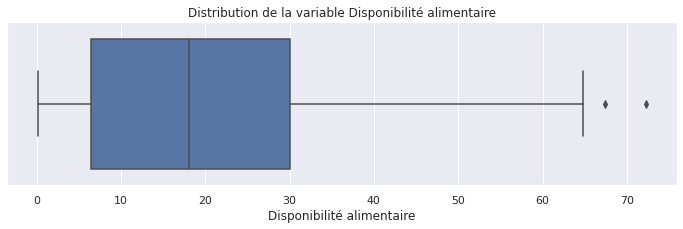

In [426]:
#Représentation la variable Disponibilité alimentaire sous forme de boxplot
plt.figure(figsize=(12, 3))
sns.set(style="darkgrid")
sns.boxplot(x=df_final["Disponibilité alimentaire"], color="b")
plt.title('Distribution de la variable Disponibilité alimentaire')
plt.savefig("distribution_dispo_al_boxplot.png")
plt.show

In [427]:
#détecte les outliers et les filtre pour avoir un nouveau dataframe sans outliers
#1er quartile
q1 = df_final['Disponibilité alimentaire'].quantile(0.25)
#3eme quartile
q3 = df_final['Disponibilité alimentaire'].quantile(0.75)
#écart interquatile
iqr = q3 - q1
print('Ecart interquatile =', round(iqr,2))
seuil_min = q1 -(1.5 * iqr) 
seuil_max = q3 +(1.5 * iqr)
print('Seuil minimum =', round(seuil_min,2))
print('Seuil maximum =', round(seuil_max,2))
#affiche le dataframe final sans outliers
df_out = df_final[(df_final['Disponibilité alimentaire'] > seuil_min) & (df_final['Disponibilité alimentaire'] < seuil_max)]
#trie par ordre croissant les donnees du df web sans outliers via la colonne 'disponibilité alimentaire' 
#df_out.sort_values('Disponibilité alimentaire', ascending=True).head()
#dataframe des outliers
dfo = df_final[(df_final['Disponibilité alimentaire'] < seuil_min) | (df_final['Disponibilité alimentaire'] > seuil_max)]
#liste des outliers
liste_out=(dfo['Disponibilité alimentaire'].tolist())
print('Nombre doutliers:', len(liste_out))
print('Liste des outliers :', liste_out)
print('\n')
#affichage des outliers 
dfo[['Pays','Disponibilité alimentaire']].sort_values(by='Disponibilité alimentaire', ascending=True)
df_final[['Pays','Disponibilité alimentaire']].sort_values(by='Disponibilité alimentaire', ascending=False).head(10)

Ecart interquatile = 23.6
Seuil minimum = -28.96
Seuil maximum = 65.43
Nombre doutliers: 2
Liste des outliers : [67.39, 72.31]




,Pays,Disponibilité alimentaire
162,Saint-Vincent-et-les Grenadines,72.31
59,Israël,67.39
106,Samoa,64.77
163,Sainte-Lucie,56.69
105,Saint-Kitts-et-Nevis,55.77
132,États-Unis d'Amérique,55.68
120,Trinité-et-Tobago,54.54
5,Antigua-et-Barbuda,54.10
25,Chine - RAS de Hong-Kong,53.51
61,Jamaïque,51.10


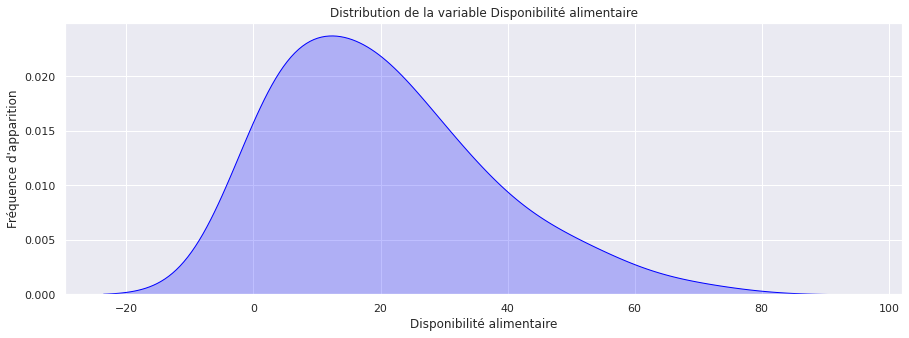

In [428]:
#distribution de la variable disponibilité alimentaire sous forme de courbe
plt.figure(figsize=(15, 5))
sns.set(style="darkgrid")
sns.kdeplot(df_final['Disponibilité alimentaire'], shade=True, bw_method=0.5, color="blue")
plt.title('Distribution de la variable Disponibilité alimentaire')
plt.xlabel('Disponibilité alimentaire')
plt.ylabel('Fréquence d\'apparition')
plt.savefig("distribution_dispo_al.png")
plt.show()

# <a name="C11"><font color='LightSeaGreen'>Importations</font></a>

<function matplotlib.pyplot.show>

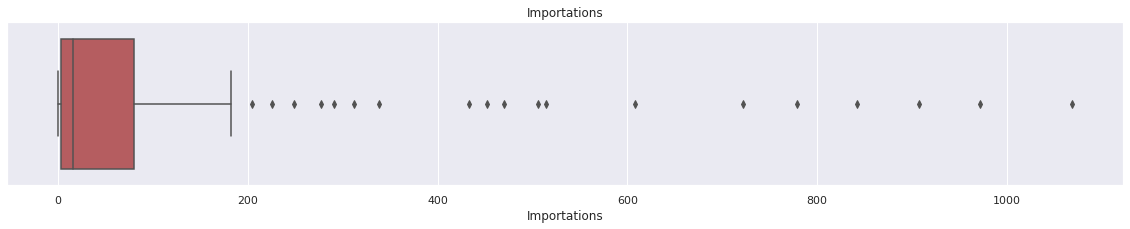

In [429]:
#utilisation de la librairie Seaborn pour representer la variable disponibilité alimentaire sous forme de boxplot
plt.figure(figsize=(20, 3))
sns.set(style="darkgrid")
sns.boxplot(x=df_final["Importations"], color="r")
plt.title('Importations')
plt.savefig("distribution_import_boxplot.png")
plt.show

In [430]:
#liste vide
outliers=[]

#fonction qui détecte, compte et liste les outliers
def liste_outliers(df):
    #seuil des valeurs aberrantes : +/- 3  
    threshold=3
    #moyenne
    mean=np.mean(df)
    #écart-type
    std=np.std(df)
    for i in df:
        zscore=(i-mean)/std
        if np.abs(zscore)>threshold:
            outliers.append(i)
    return outliers

#appel de la fonction 
l1=liste_outliers(df_final['Importations'])
print('Nombre d\'outliers :', len(l1))
print('\n') 
print('Liste des outliers : ', l1)

Nombre d'outliers : 6


Liste des outliers :  [842.0, 722.0, 907.0, 1069.0, 972.0, 779.0]


In [431]:
#détecte les outliers et les filtre pour avoir un nouveau dataframe sans outliers
#1er quartile
q1 = df_final['Importations'].quantile(0.25)
#3eme quartile
q3 = df_final['Importations'].quantile(0.75)
#écart interquatile
iqr = q3 - q1
print('Ecart interquatile =', round(iqr,2))
seuil_min = q1 -(1.5 * iqr) 
seuil_max = q3 +(1.5 * iqr)
print('Seuil minimum =', round(seuil_min,2))
print('Seuil maximum =', round(seuil_max,2))
#affiche le dataframe final sans outliers
df_out = df_final[(df_final['Importations'] > seuil_min) & (df_final['Importations'] < seuil_max)]
#trie par ordre croissant les donnees du df sans outliers via la colonne 'Importations' 
#df_out.sort_values('Disponibilité alimentaire', ascending=True).head()

#dataframe des outliers
dfo = df_final[(df_final['Importations'] < seuil_min) | (df_final['Importations'] > seuil_max)]
#liste des outliers
liste_out=(dfo['Importations'].tolist())
print('Nombre doutliers:', len(liste_out))
print('Liste des outliers :', liste_out)
print('\n')
#affichage des outliers 
dfo[['Pays','Importations']].sort_values(by='Importations', ascending=False)

Ecart interquatile = 76.75
Seuil minimum = -112.12
Seuil maximum = 194.88
Nombre doutliers: 19
Liste des outliers : [514.0, 842.0, 277.0, 722.0, 338.0, 907.0, 452.0, 205.0, 506.0, 226.0, 470.0, 1069.0, 972.0, 608.0, 249.0, 779.0, 291.0, 433.0, 312.0]




,Pays,Importations
62,Japon,1069.0
79,Mexique,972.0
25,Chine - RAS de Hong-Kong,907.0
3,Allemagne,842.0
99,Royaume-Uni de Grande-Bretagne et d'Irlande du...,779.0
6,Arabie saoudite,722.0
93,Pays-Bas,608.0
0,Afrique du Sud,514.0
43,France,506.0
56,Iraq,470.0


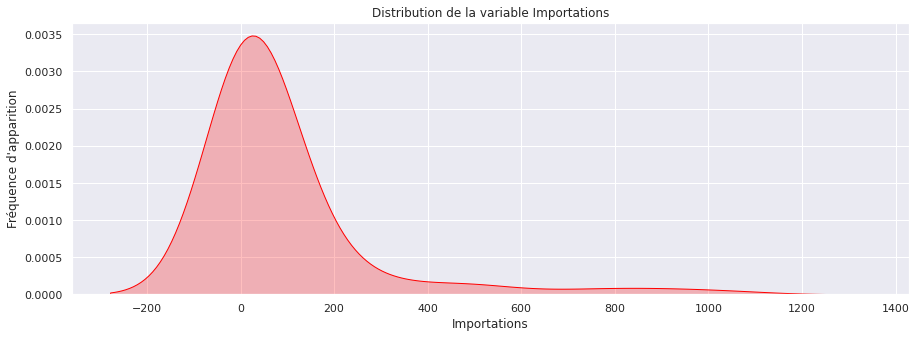

In [432]:
#distribution de la variable importation sous forme de courbe
plt.figure(figsize=(15, 5))
sns.set(style="darkgrid")
sns.kdeplot(df_final['Importations'], shade=True, bw_method=0.5, color="red")
plt.title('Distribution de la variable Importations')
plt.xlabel('Importations')
plt.ylabel('Fréquence d\'apparition')
plt.savefig("distribution_import.png")
plt.show()

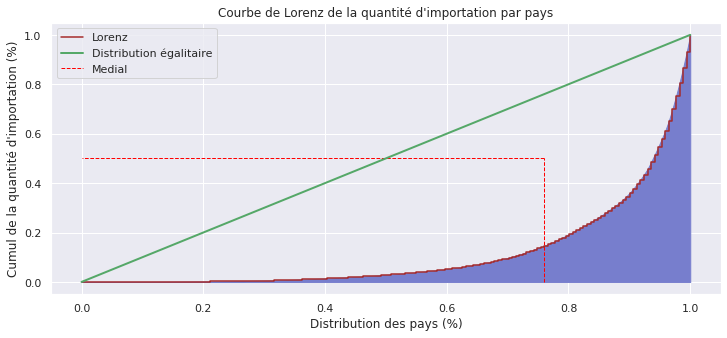

Coefficient de Gini= 0.77


In [433]:
#Courbe de Lorenz sur l'importation par pays
#Sélection du sous-échantillon de travail que l'on appelle import_pays
plt.figure(figsize=(12, 5))
import_pays = df_final['Importations'].values

#On place les observations dans une variable
#Tri des individus dans l'ordre croissant des valeurs de la variable, 
#Calcul de la somme cumulée et normalisation en divisant par la somme des observations
lorenz_import_pays = np.cumsum(np.sort(import_pays)) / import_pays.sum()

plt.plot(np.linspace(0,1,len(lorenz_import_pays)), lorenz_import_pays, drawstyle='steps-post', color='brown', label='Lorenz')
plt.fill_between(np.linspace(0,1,len(lorenz_import_pays)) ,lorenz_import_pays , color='#777ecd')
plt.plot([0, 1], [0, 1], 'g-', lw=2, label='Distribution égalitaire')
plt.vlines(x=.76, ymin=0, ymax=.5, color='red', linestyle='--', linewidth=1, label='Medial')
plt.hlines(xmin=.76, xmax=0, y=.5, color='red', linestyle='--', linewidth=1)

plt.title('Courbe de Lorenz de la quantité d\'importation par pays')
plt.xlabel("Distribution des pays (%)")
plt.ylabel("Cumul de la quantité d'importation (%)")
plt.legend(loc="best")

plt.savefig("lorenz_import_pays.png")
plt.show()

#Mesure de l'aire entre la 1ere bissectrice et la courbe de Lorenz 
#Calcul de l'indice de Gini
aire_import_pays=(lorenz_import_pays.sum()-(lorenz_import_pays[-1]/2)-(lorenz_import_pays[0]/2))/(len(lorenz_import_pays))
S_import_pays=0.5-aire_import_pays
gini_import_pays=2*S_import_pays
print('Coefficient de Gini=', round(gini_import_pays,2))

20% des pays font 80% de l'importation totale (Loi de Pareto 80/20)

# <a name="C12"><font color='LightSeaGreen'>Production</font></a>

<function matplotlib.pyplot.show>

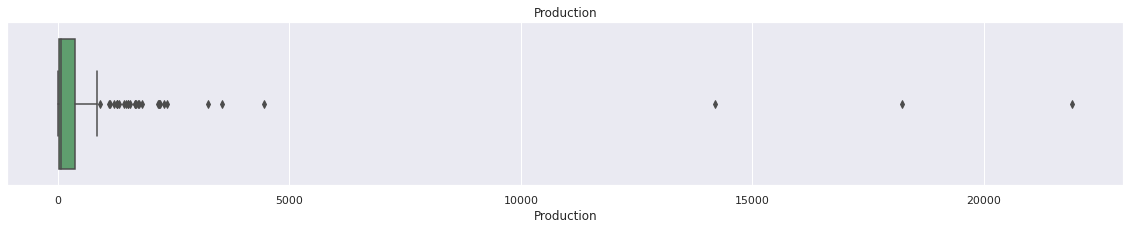

In [434]:
#utilisation de la librairie Seaborn pour representer la variable production sous forme de boxplot
plt.figure(figsize=(20, 3))
sns.set(style="darkgrid")
sns.boxplot(x=df_final["Production"], color="g")
plt.title('Production')
plt.savefig("distribution_prod_boxplot.png")
plt.show

In [435]:
#liste vide
outliers=[]

#appel de la fonction 
l1=liste_outliers(df_final['Production'])
print('Nombre d\'outliers :', len(l1))
print('\n') 
print('Liste des outliers : ', l1)
#affichage des outliers 

Nombre d'outliers : 3


Liste des outliers :  [14201.0, 18236.0, 21914.0]


In [436]:
df_final[['Pays','Production']].sort_values(by='Production', ascending=False).head(2)

,Pays,Production
132,États-Unis d'Amérique,21914.0
28,"Chine, continentale",18236.0


Les deux plus grand producteurs de poulet sont les US et la Chine continentale.

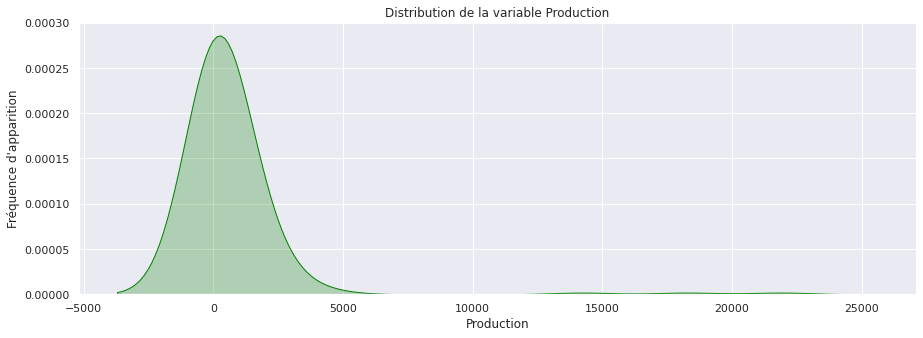

In [437]:
#distribution de la variable Production sous forme de courbe
plt.figure(figsize=(15, 5))
sns.set(style="darkgrid")
sns.kdeplot(df_final['Production'], shade=True, bw_method=0.5, color="green")
plt.title('Distribution de la variable Production')
plt.xlabel('Production')
plt.ylabel('Fréquence d\'apparition')
plt.savefig("distribution_prod.png")
plt.show()

# <a name="C12"><font color='LightSeaGreen'>Evolution de la Population 2007-2017</font></a>

<function matplotlib.pyplot.show>

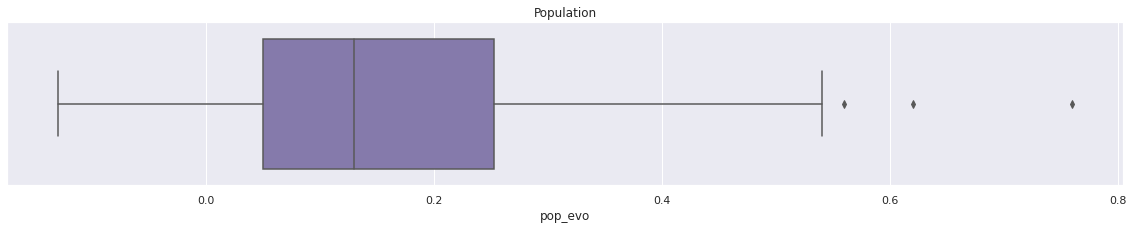

In [438]:
#utilisation de la librairie Seaborn pour representer la variable population sous forme de boxplot
plt.figure(figsize=(20, 3))
sns.set(style="darkgrid")
sns.boxplot(x=df_final["pop_evo"], color="m")
plt.title('Population')
plt.savefig("distribution_pop_boxplot.png")
plt.show

In [439]:
df_final[['Pays','pop_evo']].sort_values(by='pop_evo', ascending=False).head(20)

,Pays,pop_evo
88,Oman,0.76
67,Koweït,0.62
63,Jordanie,0.56
130,Émirats arabes unis,0.54
150,Maldives,0.48
84,Niger,0.47
70,Liban,0.43
4,Angola,0.43
89,Ouganda,0.40
45,Gabon,0.40


# <a name="C14"><font color='LightSeaGreen'>PIB/Habitant</font></a>

<function matplotlib.pyplot.show>

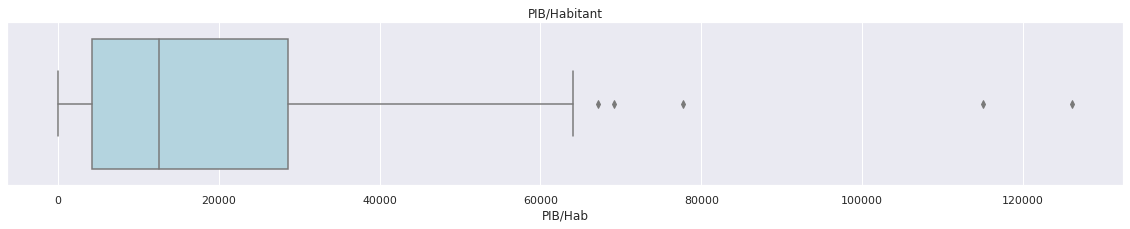

In [440]:
#utilisation de la librairie Seaborn pour representer la variable population sous forme de boxplot
plt.figure(figsize=(20, 3))
sns.set(style="darkgrid")
sns.boxplot(x=df_final["PIB/Hab"], color="lightblue")
plt.title('PIB/Habitant')
plt.savefig("distribution_pop_boxplot.png")
plt.show

In [441]:
df_final[['Pays','PIB/Hab']].sort_values(by='PIB/Hab', ascending=False).head()

,Pays,PIB/Hab
26,Chine - RAS de Macao,126144.0
73,Luxembourg,114986.0
57,Irlande,77749.2
112,Suisse,69103.6
130,Émirats arabes unis,67183.6


# <a name="C15"><font color='LightSeaGreen'>Indice de stabilité politique</font></a>

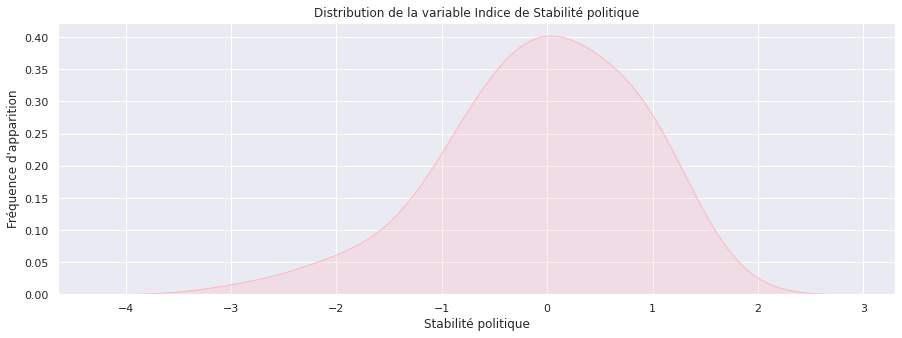

In [442]:
#distribution de la variable Production sous forme de courbe
plt.figure(figsize=(15, 5))
sns.set(style="darkgrid")
sns.kdeplot(df_final['Indice de stabilité'], shade=True, bw_method=0.5, color="lightpink")
plt.title('Distribution de la variable Indice de Stabilité politique')
plt.xlabel('Stabilité politique')
plt.ylabel('Fréquence d\'apparition')
plt.savefig("distribution_stab_po.png")
plt.show()

In [443]:
df_final[['Pays','Indice de stabilité']].sort_values(by='Indice de stabilité', ascending=False).head(20)

,Pays,Indice de stabilité
87,Nouvelle-Zélande,1.60
26,Chine - RAS de Macao,1.43
58,Islande,1.35
73,Luxembourg,1.33
112,Suisse,1.26
76,Malte,1.25
36,Dominique,1.20
106,Samoa,1.18
86,Norvège,1.17
97,Portugal,1.12


In [444]:
# Tranches d'indice de stabilité politique
#df_final['classe_indice'] = 'Pays instable'
#df_final['classe_indice'].loc[df_final[df_final['Indice de stabilité']>=0].index] = 'Pays stable'
#df_final['classe_indice'].loc[df_final[df_final['Indice de stabilité']>=1].index] = 'Pays très stable'

#df_final.head()

# **<font color='indianred'>Partie 4 : Analyse bivariée des indicateurs</font>**

On distingue 3 groupes d'indicateurs:

1er groupe :
*   Disponibilité alimentaire
*   Importations
*   Production

2ème groupe : Population

3ème groupe :
*   PIB/ Habitant
*   Indice de stabilité politique







# <a name="C16"><font color='LightSeaGreen'>Disponibilité alimentaire / Importations</font></a>


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Disponibilité / Importations')

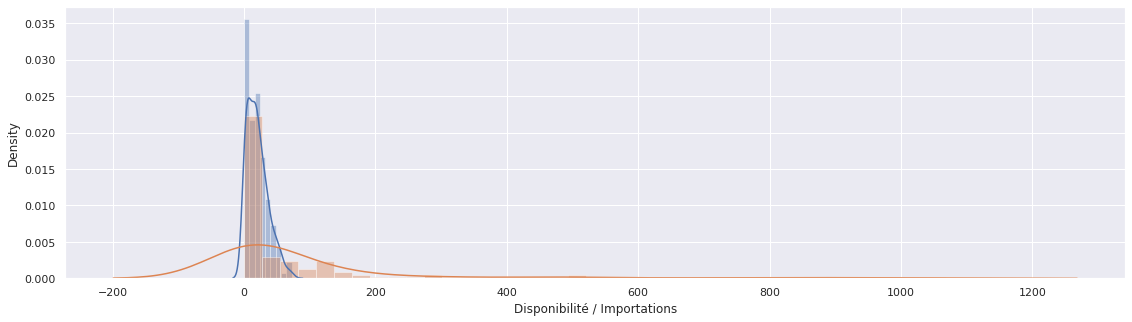

In [445]:
#Visualizing the data - displot
plt.figure(figsize=(19,5))
plot_dispo = sns.distplot(df_final["Disponibilité alimentaire"])
plot_import = sns.distplot(df_final["Importations"])
plt.xlabel('Disponibilité / Importations')

Question : Les importations dependent-elles de la disponibilité alimentaire ? Réponse: Oui/Non

H0 : les importations ne dépendent pas de la disponibilité alimentaire
H1 : les importations dépendent de la disponibilité alimentaire

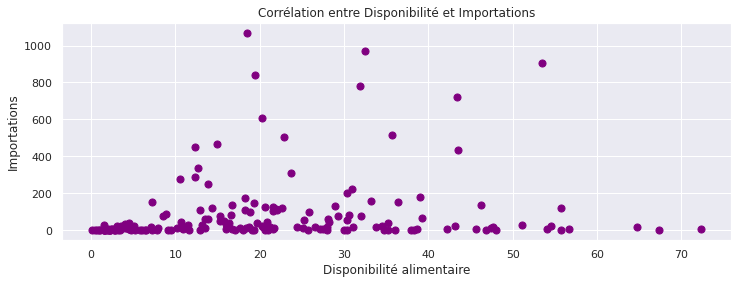

In [446]:
plt.figure(figsize=(12,4))
sns.regplot(data=df_final, x="Disponibilité alimentaire", y="Importations",fit_reg=False, scatter_kws={"color":"purple","alpha":1.0,"s":50})
plt.xlabel('Disponibilité alimentaire')
plt.ylabel('Importations')
plt.title('Corrélation entre Disponibilité et Importations')
plt.savefig("dispo_imp.png")
plt.show()

In [447]:
#Test  de Pearson : calcul du coefficient de corrélation de Pearson et de la p-value
from scipy.stats import pearsonr 
CorrAgeMontant = pd.DataFrame(pearsonr(df_final['Disponibilité alimentaire'], df_final['Importations']),index=['Pearson_coeff','p-value'],columns=['resultat_test']) 
CorrAgeMontant

,resultat_test
Pearson_coeff,0.180977
p-value,0.017509


In [448]:
#Test de Spearman
st.spearmanr(df_final['Disponibilité alimentaire'], df_final['Importations'])

SpearmanrResult(correlation=0.35496867148232764, pvalue=1.77093275678811e-06)

p-value < 0.05 => Il y a une dépendance entre la disponibilité alimentaire et les importations.

# <a name="C17"><font color='LightSeaGreen'>Disponibilité alimentaire / Production</font></a>

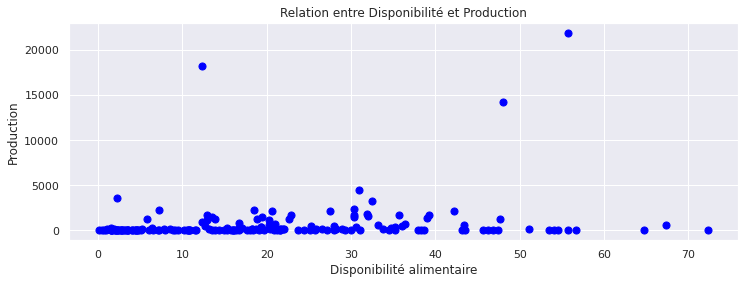

In [449]:
plt.figure(figsize=(12,4))
sns.regplot(data=df_final, x="Disponibilité alimentaire", y="Production",fit_reg=False, scatter_kws={"color":"blue","alpha":1.0,"s":50})
plt.xlabel('Disponibilité alimentaire')
plt.ylabel('Production')
plt.title('Relation entre Disponibilité et Production')
plt.savefig("dispo_prod.png")
plt.show()

In [450]:
#Test  de Pearson : calcul du coefficient de corrélation de Pearson et de la p-value
from scipy.stats import pearsonr 
CorrAgeMontant = pd.DataFrame(pearsonr(df_final['Disponibilité alimentaire'], df_final['Production']),index=['Pearson_coeff','p-value'],columns=['resultat_test']) 
CorrAgeMontant

,resultat_test
Pearson_coeff,0.192822
p-value,0.011269


In [451]:
#Test de Spearman
st.spearmanr(df_final['Disponibilité alimentaire'], df_final['Production'])

SpearmanrResult(correlation=0.1936882095561007, pvalue=0.010901842184134383)

p-value < 0.05  =>  Dépendance entre la disponibilité alimentaire et la production.

# <a name="C18"><font color='LightSeaGreen'>Importations / Production</font></a>

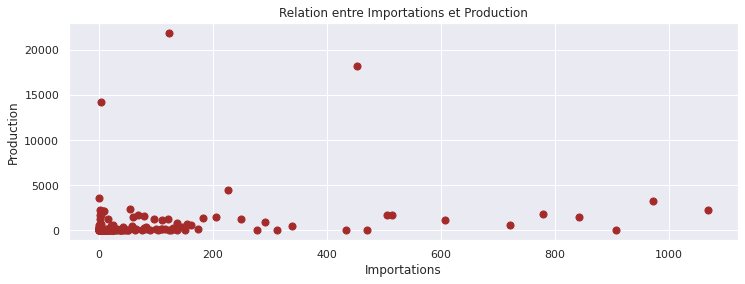

In [452]:
plt.figure(figsize=(12,4))
sns.regplot(data=df_final, x='Importations', y="Production",fit_reg=False, scatter_kws={"color":"brown","alpha":1.0,"s":50})
plt.xlabel('Importations')
plt.ylabel('Production')
plt.title('Relation entre Importations et Production')
plt.savefig("imp_prod.png")
plt.show()

In [453]:
#Test  de Pearson : calcul du coefficient de corrélation de Pearson et de la p-value
from scipy.stats import pearsonr 
CorrAgeMontant = pd.DataFrame(pearsonr(df_final['Importations'], df_final['Production']),index=['Pearson_coeff','p-value'],columns=['resultat_test']) 
CorrAgeMontant

,resultat_test
Pearson_coeff,0.195449
p-value,0.010187


In [454]:
#Test de Spearman
st.spearmanr(df_final['Importations'], df_final['Production'])

SpearmanrResult(correlation=0.28055901219700863, pvalue=0.00019314351936276246)

Il y a corrélation entre les deux variables importations et production.


# <a name="C19"><font color='LightSeaGreen'>Importations / Population</font></a>

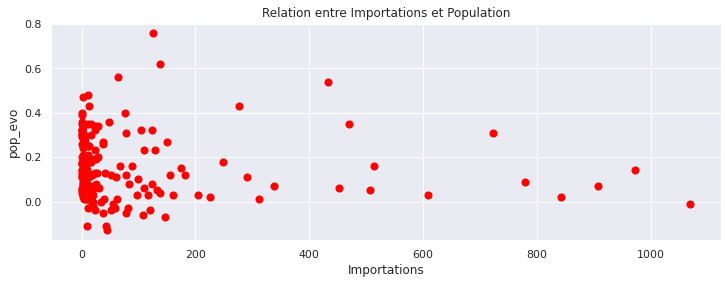

In [455]:
plt.figure(figsize=(12,4))
sns.regplot(data=df_final, x="Importations", y="pop_evo",fit_reg=False, scatter_kws={"color":"red","alpha":1.0,"s":50})
plt.xlabel('Importations')
plt.ylabel('pop_evo')
plt.title('Relation entre Importations et Population')
plt.savefig("imp_pop.png")
plt.show()

In [456]:
#Test  de Pearson : calcul du coefficient de corrélation de Pearson et de la p-value
from scipy.stats import pearsonr 
CorrAgeMontant = pd.DataFrame(pearsonr(df_final['Importations'], df_final['pop_evo']),index=['Pearson_coeff','p-value'],columns=['resultat_test']) 
CorrAgeMontant

,resultat_test
Pearson_coeff,-0.072425
p-value,0.345089


In [457]:
#Test de Spearman
st.spearmanr(df_final['Importations'], df_final['pop_evo'])

SpearmanrResult(correlation=-0.2195535584453957, pvalue=0.003805917538949909)

Pas de corrélation entre les importations et la population des pays.

# <a name="C20"><font color='LightSeaGreen'>Indice de stabilité politique / PIB par Habitant</font></a>

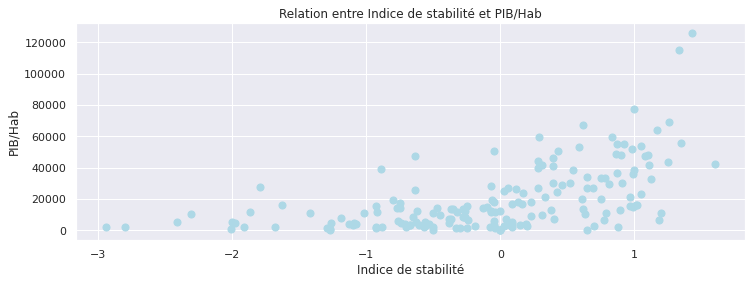

In [458]:
plt.figure(figsize=(12,4))
sns.regplot(data=df_final, x="Indice de stabilité", y="PIB/Hab",fit_reg=False, scatter_kws={"color":"lightblue","alpha":1.0,"s":50})
plt.xlabel('Indice de stabilité')
plt.ylabel('PIB/Hab')
plt.title('Relation entre Indice de stabilité et PIB/Hab')
plt.savefig("ind_pib.png")
plt.show()

In [459]:
#Test  de Pearson : calcul du coefficient de corrélation de Pearson et de la p-value
from scipy.stats import pearsonr 
CorrAgeMontant = pd.DataFrame(pearsonr(df_final['Indice de stabilité'], df_final['PIB/Hab']),index=['Pearson_coeff','p-value'],columns=['resultat_test']) 
CorrAgeMontant

,resultat_test
Pearson_coeff,5.556948e-01
p-value,2.524935e-15


In [460]:
#Test de Spearman
st.spearmanr(df_final['Indice de stabilité'], df_final['PIB/Hab'])

SpearmanrResult(correlation=0.6020417671201611, pvalue=2.4298457415994972e-18)

Il y a une forte corrélation entre l'indice de stabilité politique et le PIB par habitant.

# **<font color='indianred'>Partie 5 : CAH, Kmeans et ACP</font>**

In [473]:
df_final.head()

,Pays,Disponibilité alimentaire,Exportations,Importations,Production,PIB/Hab,Indice de stabilité,pop_evo,ratio_prot_animale
0,Afrique du Sud,35.69,63.0,514.0,1667.0,13860.3,-0.28,0.16,0.447930
1,Albanie,16.36,0.0,38.0,13.0,12771.0,0.38,-0.05,0.538394
2,Algérie,6.38,0.0,2.0,275.0,11737.4,-0.92,0.21,0.279955
3,Allemagne,19.47,646.0,842.0,1514.0,53071.5,0.59,0.02,0.604027
4,Angola,10.56,0.0,277.0,42.0,7310.9,-0.38,0.43,0.299618


In [475]:
df_finalise=df_final.copy()
df_finalise.head()

,Pays,Disponibilité alimentaire,Exportations,Importations,Production,PIB/Hab,Indice de stabilité,pop_evo,ratio_prot_animale
0,Afrique du Sud,35.69,63.0,514.0,1667.0,13860.3,-0.28,0.16,0.447930
1,Albanie,16.36,0.0,38.0,13.0,12771.0,0.38,-0.05,0.538394
2,Algérie,6.38,0.0,2.0,275.0,11737.4,-0.92,0.21,0.279955
3,Allemagne,19.47,646.0,842.0,1514.0,53071.5,0.59,0.02,0.604027
4,Angola,10.56,0.0,277.0,42.0,7310.9,-0.38,0.43,0.299618


In [487]:
df_finalise=(df_finalise[(df_finalise['Pays']!='Chine, continentale') | 
                                          (df_finalise['Pays']!='États-Unis d\'Amérique') | 
                                          (df_finalise['Pays']!='Brésil')])
df_finalise

,Pays,Disponibilité alimentaire,Exportations,Importations,Production,PIB/Hab,Indice de stabilité,pop_evo,ratio_prot_animale
0,Afrique du Sud,35.69,63.0,514.0,1667.0,13860.3,-0.28,0.16,0.447930
1,Albanie,16.36,0.0,38.0,13.0,12771.0,0.38,-0.05,0.538394
2,Algérie,6.38,0.0,2.0,275.0,11737.4,-0.92,0.21,0.279955
3,Allemagne,19.47,646.0,842.0,1514.0,53071.5,0.59,0.02,0.604027
4,Angola,10.56,0.0,277.0,42.0,7310.9,-0.38,0.43,0.299618
...,...,...,...,...,...,...,...,...,...
167,Timor-Leste,4.24,14.0,11.0,1.0,3177.5,0.07,0.20,0.265938
168,Turkménistan,4.52,4.0,9.0,20.0,14205.0,-0.13,0.18,0.407778
169,Vanuatu,11.66,3.0,4.0,1.0,3081.5,0.70,0.30,0.417187
170,Zimbabwe,4.68,0.0,6.0,69.0,3795.6,-0.71,0.16,1.000000


In [ ]:
df_finalise.head()

In [ ]:
df_finalise=df_finalise.set_index('Pays')

In [ ]:
df_finalise=df_finalise[['Disponibilité alimentaire', 'Importations', 'PIB/Hab', 'Indice de stabilité', 'pop_evo', 'ratio_prot_animale']]
df_finalise.head() 

In [ ]:
#utilisation de la librairie Seaborn pour representer la variable population sous forme de boxplot
plt.figure(figsize=(20, 3))
sns.set(style="darkgrid")
sns.boxplot(x=df_final["ratio_prot_animale"], color="yellow")
plt.title('ratio_prot_animale')
plt.savefig("distribution_ratio_prot_animale_boxplot.png")
plt.show

In [ ]:
df_final[['Pays','ratio_prot_animale']].sort_values(by='ratio_prot_animale', ascending=False).head()

In [ ]:
# Calculate pairwise-correlation
matrix = df_finalise.corr()

# Triangle de corrélations
mask = np.triu(np.ones_like(matrix, dtype=np.bool))
plt.figure(figsize=(15, 5))
sns.heatmap(matrix, mask=mask, annot=True, cmap='PiYG')
plt.show()

# <a name="C20"><font color='LightSeaGreen'>Classification Ascendante Hiérarchique</font></a>

In [ ]:
from functions import plot_dendrogram

# préparation des données pour le clustering
X = df_finalise
nom_pays = df_finalise.index

In [ ]:
# Centrage et Réduction
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Clustering hiérarchique
from scipy.cluster.hierarchy import linkage, fcluster

Z = linkage(X_scaled, method = 'ward', metric='euclidean')

# Clustering hiérarchique: Affichage du dendrogramme
from scipy.cluster.hierarchy import dendrogram

fig =plt.figure(figsize=(35,9))
sns.set_style('white')
plt.title('Dendogramme', fontsize=20)
plt.ylabel('Distance')
dendrogram(Z, labels = df_finalise.index, leaf_font_size=12, color_threshold=10, orientation='top')
plt.savefig('dendogram.png')
plt.show()

In [ ]:
#5 clusters avec le nombre de pays pour chacun
fig = plt.figure(figsize=(15,5))
sns.set_style('white')
plt.title('Dendrogramme en 5 clusters', fontsize=20)
plt.xlabel('distance', fontsize=15)
dendrogram(Z, labels = df_finalise.index, p=4, truncate_mode='lastp', leaf_font_size=15, orientation='left', show_contracted=True,
)
plt.show()

In [ ]:
# On récupère les données du dendrogramme
# puis on crée un DataFrame avec la liste des pays associée à leur cluster

cluster = fcluster(Z, t=4, criterion='maxclust')
pays_clustered = pd.DataFrame({'Pays' : df_finalise.index.tolist(),
                             'cluster' : cluster})
pays_clustered = pays_clustered.sort_values(['cluster', 'Pays'])
pays_clustered.head()

In [ ]:
pays_clustered = pd.merge(df_finalise, pays_clustered, on='Pays')
pays_clustered.head()

In [ ]:
cluster1=pays_clustered[pays_clustered['cluster']==1]
cluster2=pays_clustered[pays_clustered['cluster']==2]
cluster3=pays_clustered[pays_clustered['cluster']==3]
cluster4=pays_clustered[pays_clustered['cluster']==4]
cluster5=pays_clustered[pays_clustered['cluster']==5]
cluster6=pays_clustered[pays_clustered['cluster']==6]
cluster5.head()

In [ ]:
#Première comparaison des moyennes afin d'identifier le groupe de pays le plus porteur à ce niveau de l'analyse
pays_clustered.groupby('cluster').mean()

In [ ]:
#Pays de chaque cluster
print('Cluster 1 :', cluster1['Pays'].unique())
print('Cluster 2 :',cluster2['Pays'].unique())
print('Cluster 3 :',cluster3['Pays'].unique())
print('Cluster 4 :',cluster4['Pays'].unique())
print('Cluster 5 :',cluster5['Pays'].unique())
print('Cluster 6 :',cluster6['Pays'].unique())

BOXPLOTS

In [ ]:
#Comparaison visuelle des groupes par Boxplot, en abscisse les numéros des groupes
plt.figure(figsize=(25, 20))
sns.set(style="whitegrid")
plt.subplot(2, 4, 1)

plt.subplot(241)
sns.boxplot(data=pays_clustered, x='cluster', y='Disponibilité alimentaire')

#plt.subplot(242)
#sns.boxplot(data=pays_clustered, x='cluster', y='Exportations')

plt.subplot(243)
sns.boxplot(data=pays_clustered, x='cluster', y='Importations')

#plt.subplot(244)
#sns.boxplot(data=pays_clustered, x='cluster', y='Production')

plt.subplot(245)
sns.boxplot(data=pays_clustered, x='cluster', y='PIB/Hab')

plt.subplot(246)
sns.boxplot(data=pays_clustered, x='cluster', y='Indice de stabilité')

plt.subplot(247)
sns.boxplot(data=pays_clustered, x='cluster', y='pop_evo')

plt.subplot(248)
sns.boxplot(data=pays_clustered, x='cluster', y='ratio_prot_animale')

plt.savefig("boxplots.png")
plt.show()

Ciblage des cluster:

*    J'élimine les groupes 1 et 2 car ils ont un PIB/hab et une stabilité politique très faible, n'importent pas beaucoup et ne consomment pas beaucoup de protéines animales.

*   le cluster 6 pourrait être séléctionné car le PIB/hab, la stabilité politique, l'évolution de la population sont élévés. Cependant, ils n'importent pas beaucoup et leur disponibilité alimentaire est élévée donc ils n'auraient pas besoin d'importer. De plus, il y a 3 pays du Golfe et un pays asiatique, qui sont assez éloignés de la France donc la livraison pourrait coûter plus chère.Seul le Luxembourg pourrait être candidat.

*   J'élimine les pays du groupe 4 car ils ont un PIB/hab faible, n'importent pas beaucoup, ne consomment pas beaucoup de protéines animales et dont la population ne croît pas en 10 ans.

*   Je retiens le groupe 3 car le PIB/hab et la stabilité politique sont satisfaisants, ainsi que le ratio protéine animale et il y a beaucoup de pays proches de la France. Cependant, la population ne croît pas beaucoup en 10 ans.

*   Je retiens le groupe 5 qui importe beaucoup, le PIB/hab et la stabilité politique sont satisfaisants, ainsi que le ratio protéine animale et quelques pays européens sont présents. Cependant, la population ne croît pas beaucoup en 10 ans.





# <a name="C20"><font color='LightSeaGreen'>Analyse en Composantes Principales (PCA)</font></a>

In [ ]:
cluster

In [ ]:
from sklearn.decomposition import PCA
from sklearn import decomposition, preprocessing

n_comp=4

# Création du PCA pour réduire les données à 2 dimensions pour la visualisation
pca = PCA(n_components=n_comp)
pca.fit(X_scaled)

# Cercle des corrélations
from functions import display_circles
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(df_finalise.columns))

# Projection des individus (nouvel espace vectoriel)
X_projected = pca.transform(X_scaled)

# Affiche un scatter plot des points des data dans le nouvel espace vectoriel
from functions import display_factorial_planes
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], labels=None, illustrative_var = cluster, alpha = 0.8)

# Eboulis des valeurs propres
from functions import display_scree_plot
display_scree_plot(pca)

plt.show()

In [ ]:
# Add the cluster number to the original scaled data
X_clustered = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)
X_clustered["cluster"] = cluster

# Display parallel coordinates plots, one for each cluster
#from functions import parallel_coordinates
#from functions import display_parallel_coordinates
#display_parallel_coordinates(X_clustered, 5)

In [ ]:
#Variance of the data explained by each of the 4 principal components, 
#starting with PC1, the principal component that explains most of the variance.
pca.explained_variance_ratio_

In [ ]:
#if we sum up the values in this array they will equal 1,
#indicating that the 4 principal components together explain 100% of the variance of the data.
pca.explained_variance_ratio_.cumsum()

In [ ]:
#Moyenne de chaque variable dans chaque cluster
means =  X_clustered.groupby(by="cluster").mean()
means

In [ ]:
from functions import display_parallel_coordinates_centroids
display_parallel_coordinates_centroids(means.reset_index(), 5)

# <a name="C20"><font color='LightSeaGreen'>K-Means</font></a>

In [ ]:
# préparation des données pour le clustering
X = df_finalise
nom_pays = df_finalise.index
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)
X_scaled

In [ ]:
#Calcul  de la métrique "silhouette" pour différents nombres de groupes issus de la méthode des centres mobiles
#Liste pour stocker nos coefficients
silhouettes = [] 

#Boucle itérative de 2 à 10 (clusters) pour tester les possibilités
for k in range(2, 10): 
    #Création et ajustement d'un modèle pour chaque k
    cls = KMeans(n_clusters=k)  
    cls.fit(X_scaled)
    
    #Stockage des coefficients associés
    silh = metrics.silhouette_score(X_scaled, cls.labels_)
    silhouettes.append(silh)
    
#Visualisation des valeurs de coefficient de silhouette pour chaque nombre de cluster
plt.plot(range(2, 10), silhouettes, marker='o')
plt.show()


In [ ]:
#On crée une liste dans laquelle on stocke les inerties
inerties=[]

#On fait une boucle de 2 à 9 pour tester toutes ces possibiliéts
for k in range(2, 10):
    #pour chaque k, on crée un modèle et on l’ajuste
    km = KMeans(n_clusters=k)
    km.fit(X_scaled)
    #on stocke l’inertie associée
    inerties.append(km.inertia_)

#Visualisation des valeurs d'inertie pour chaque nombre de cluster
plt.plot(range(2, 10), inerties, marker='o')
plt.show()


In [ ]:
# Import the kmeans algorithm
from sklearn.cluster import KMeans

# Create a k-means clustering model
kmeans = KMeans(n_clusters=4, n_init=20, init='k-means++')

# Fit the data to the model
kmeans.fit(X_scaled)

# Determine which clusters each data point belongs to:
clusters =  kmeans.predict(X_scaled)
clusters

In [ ]:
#numéros de cluster affectés aux groupes
kmeans.labels_

In [ ]:
import numpy
numpy.unique(kmeans.labels_, return_counts=True)

In [ ]:
df_km=df_finalise.copy()
df_km['nocl'] = kmeans.labels_
df_km.head()

In [ ]:
df_km=df_km.reset_index()

In [ ]:
clusterkm0=df_km[df_km['nocl']==0]
clusterkm1=df_km[df_km['nocl']==1]
clusterkm2=df_km[df_km['nocl']==2]
clusterkm3=df_km[df_km['nocl']==3]
clusterkm4=df_km[df_km['nocl']==4]
clusterkm5=df_km[df_km['nocl']==5]
clusterkm1.head()

In [ ]:
print('Cluster 0 :', clusterkm0['Pays'].unique())
print('Cluster 1 :', clusterkm1['Pays'].unique())
print('Cluster 2 :', clusterkm2['Pays'].unique())
print('Cluster 3 :', clusterkm3['Pays'].unique())
print('Cluster 4 :', clusterkm4['Pays'].unique())
print('Cluster 5 :', clusterkm5['Pays'].unique())

In [ ]:
dfg=df_km.groupby('nocl').mean()
dfg

# <a name="C20"><font color='LightSeaGreen'>Analyse en Composantes Principales (PCA)</font></a>

In [ ]:
from sklearn.decomposition import PCA
#Calcul des composantes principales
pca = decomposition.PCA(svd_solver='full')
pca.fit(X_scaled)

In [ ]:
#Pourcentage de variance expliquée par les composantes principales à l'aide de .explained_variance_ratio_
print(pca.explained_variance_ratio_.cumsum())


In [ ]:
#Représentation de la variance expliquée 
pca = decomposition.PCA()
pca.fit(X_scaled)
scree = pca.explained_variance_ratio_*100

plt.bar(np.arange(len(scree))+1, scree)
plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show()

In [ ]:
#Coordonnées factorielles 
X_projected = pca.transform(X_scaled)
plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=kmeans.labels_)
plt.xlabel('F{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)))
plt.ylabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)))
plt.title("Projection en 4 clusters des {} individus sur le 1er plan factoriel".format(X_projected.shape[0]))

#plt.savefig("p5_graphic/projection_clusters.png")
plt.show()

In [ ]:
#Tableau des Centroïdes 5 clusters dans sa version centrée réduite
#La comparaison est tout de suite simplifiée, les dimensions prenant la même importance!
centroids = kmeans.cluster_centers_
pd.DataFrame(centroids, columns=df_finalise.columns)

Groupe 1 et 3